In [4]:
import numpy as np
import pandas as pd
import scipy.stats
import statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

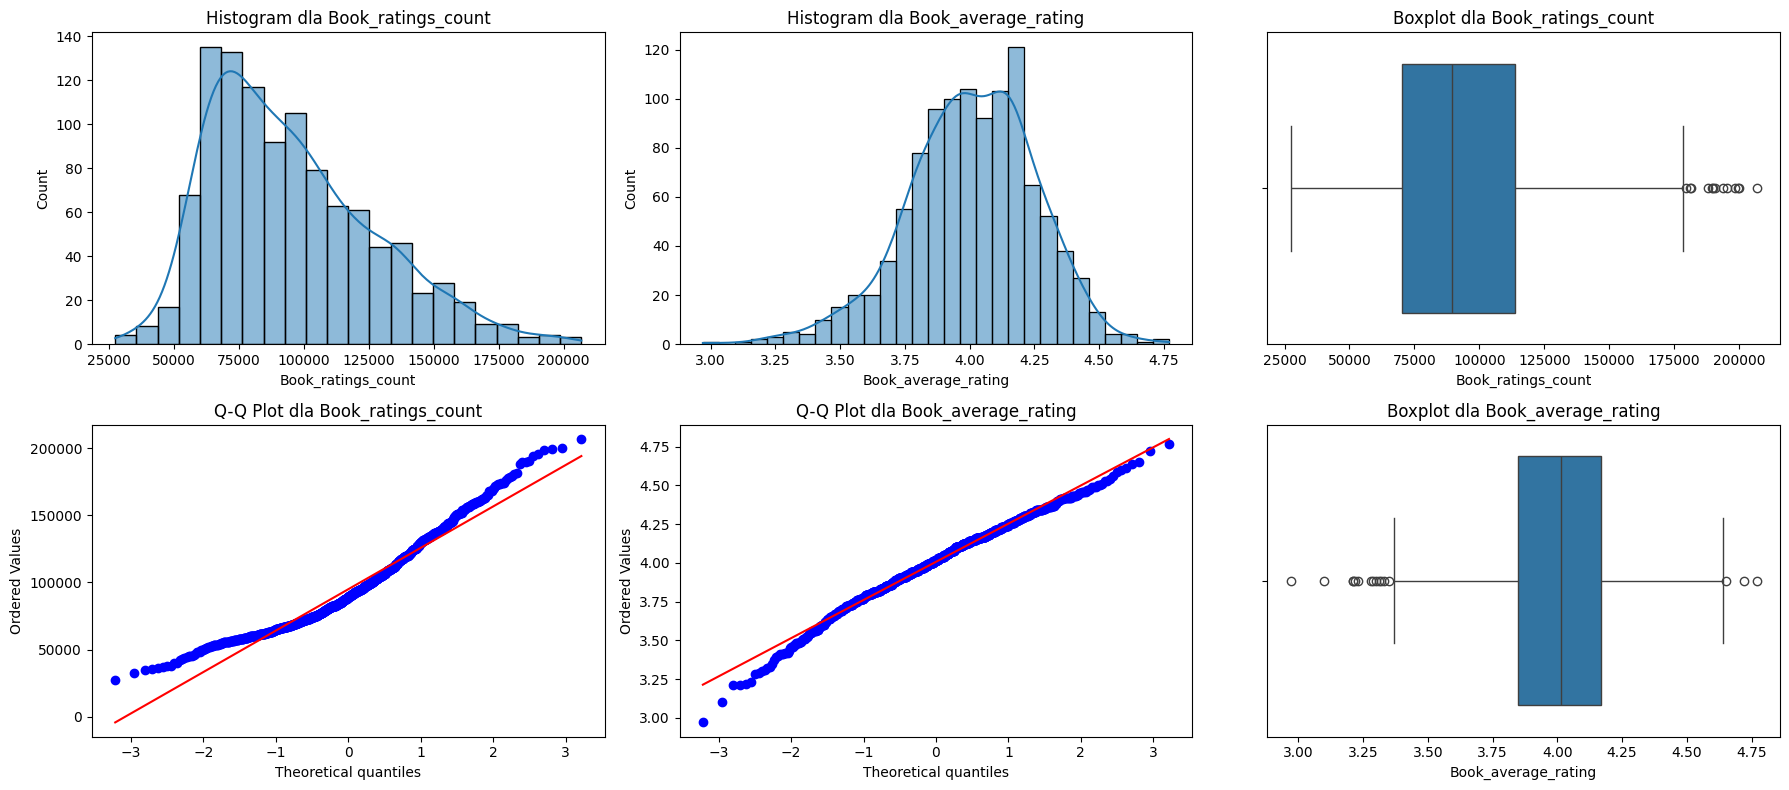

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

file_path = "books_data_clean.csv"
data = pd.read_csv(file_path)

print(data.info())

print(data.head())

# Podstawowe statystyki
descriptive_stats = data.describe()
print(descriptive_stats)

# Skośność i kurtoza
skewness_ratings_count = stats.skew(data['Book_ratings_count'])
kurtosis_ratings_count = stats.kurtosis(data['Book_ratings_count'])
skewness_avg_rating = stats.skew(data['Book_average_rating'])
kurtosis_avg_rating = stats.kurtosis(data['Book_average_rating'])

print(f"Skośność Book_ratings_count: {skewness_ratings_count}")
print(f"Kurtoza Book_ratings_count: {kurtosis_ratings_count}")
print(f"Skośność Book_average_rating: {skewness_avg_rating}")
print(f"Kurtoza Book_average_rating: {kurtosis_avg_rating}")

# korelacja pomiędzy kolumnami "Book_ratings_count" i "Book_average_rating"
correlation = data['Book_ratings_count'].corr(data['Book_average_rating'])
print(f"Korelacja między Book_ratings_count a Book_average_rating: {correlation}")

# test normalności dla kolumny "Book_ratings_count"
normality_test_statistic, p_value = stats.normaltest(data['Book_ratings_count'])
print(f"Statystyka testu normalności dla Book_ratings_count: {normality_test_statistic}")
print(f"P-wartość dla testu normalności dla Book_ratings_count: {p_value}")

# test normalności dla kolumny "Book_average_rating"
normality_test_statistic_avg, p_value_avg = stats.normaltest(data['Book_average_rating'])
print(f"Statystyka testu normalności dla Book_average_rating: {normality_test_statistic_avg}")
print(f"P-wartość dla testu normalności dla Book_average_rating: {p_value_avg}")

# test Shapiro-Wilka dla kolumny "Book_ratings_count"
shapiro_test_statistic, shapiro_p_value = stats.shapiro(data['Book_ratings_count'])
print(f"Statystyka testu Shapiro-Wilka dla Book_ratings_count: {shapiro_test_statistic}")
print(f"P-wartość dla testu Shapiro-Wilka dla Book_ratings_count: {shapiro_p_value}")

# test Shapiro-Wilka dla kolumny "Book_average_rating"
shapiro_test_statistic_avg, shapiro_p_value_avg = stats.shapiro(data['Book_average_rating'])
print(f"Statystyka testu Shapiro-Wilka dla Book_average_rating: {shapiro_test_statistic_avg}")
print(f"P-wartość dla testu Shapiro-Wilka dla Book_average_rating: {shapiro_p_value_avg}")

plt.figure(figsize=(18, 8))

plt.subplot(2, 3, 1)
sns.histplot(data['Book_ratings_count'], kde=True)
plt.title('Histogram dla Book_ratings_count')

plt.subplot(2, 3, 2)
sns.histplot(data['Book_average_rating'], kde=True)
plt.title('Histogram dla Book_average_rating')

# Q-Q Plots dla testów normalności
plt.subplot(2, 3, 4)
stats.probplot(data['Book_ratings_count'], dist="norm", plot=plt)
plt.title('Q-Q Plot dla Book_ratings_count')

plt.subplot(2, 3, 5)
stats.probplot(data['Book_average_rating'], dist="norm", plot=plt)
plt.title('Q-Q Plot dla Book_average_rating')

plt.subplot(2, 3, 3)
sns.boxplot(x=data['Book_ratings_count'])
plt.title('Boxplot dla Book_ratings_count')

plt.subplot(2, 3, 6)
sns.boxplot(x=data['Book_average_rating'])
plt.title('Boxplot dla Book_average_rating')

plt.tight_layout()
plt.show()


Średnia VIQ: 112.35
Liczba kobiet i mężczyzn:
Gender
Female    20
Male      20
Name: count, dtype: int64


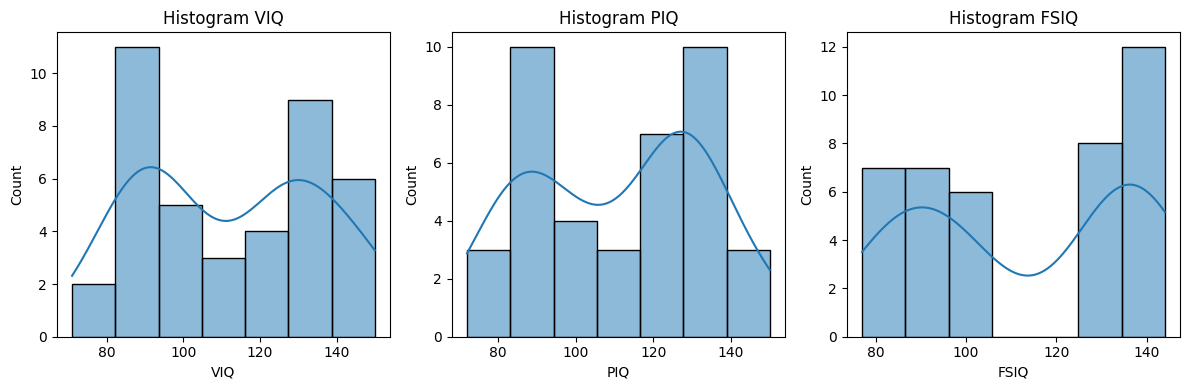

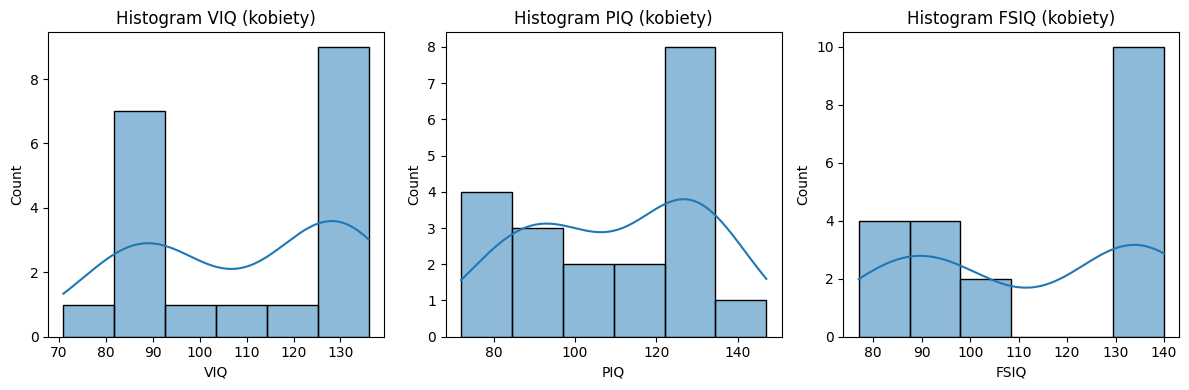

In [6]:
file_path = "brain_size.csv"
brain_data = pd.read_csv(file_path, sep=';')

if 'VIQ' in brain_data.columns:
    average_viq = brain_data['VIQ'].mean()
    print(f"Średnia VIQ: {average_viq}")
else:
    print("Kolumna VIQ nie istnieje w danych.")

# Określ liczbę kobiet i mężczyzn
gender_counts = brain_data['Gender'].value_counts()
print("Liczba kobiet i mężczyzn:")
print(gender_counts)

if 'VIQ' in brain_data.columns and 'PIQ' in brain_data.columns and 'FSIQ' in brain_data.columns:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(brain_data['VIQ'], kde=True)
    plt.title('Histogram VIQ')

    plt.subplot(1, 3, 2)
    sns.histplot(brain_data['PIQ'], kde=True)
    plt.title('Histogram PIQ')

    plt.subplot(1, 3, 3)
    sns.histplot(brain_data['FSIQ'], kde=True)
    plt.title('Histogram FSIQ')

    plt.tight_layout()
    plt.show()
else:
    print("Niektóre zmienna VIQ, PIQ, FSIQ nie istnieją w danych.")

if 'VIQ' in brain_data.columns and 'PIQ' in brain_data.columns and 'FSIQ' in brain_data.columns:
    female_data = brain_data[brain_data['Gender'] == 'Female']
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(female_data['VIQ'], kde=True)
    plt.title('Histogram VIQ (kobiety)')

    plt.subplot(1, 3, 2)
    sns.histplot(female_data['PIQ'], kde=True)
    plt.title('Histogram PIQ (kobiety)')

    plt.subplot(1, 3, 3)
    sns.histplot(female_data['FSIQ'], kde=True)
    plt.title('Histogram FSIQ (kobiety)')

    plt.tight_layout()
    plt.show()
else:
    print("Niektóre zmienna VIQ, PIQ, FSIQ nie istnieją w danych.")
